# Data Science Project: TBD

**Author**: Samer Eladad

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Clean combined movies dataset
movies_clean_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/new_clean_combined_movies.csv'
movies_clean_df = pd.read_csv(movies_clean_path)

# Clean combined series dataset
series_clean_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/data/clean/clean_combined_series.csv'
series_clean_df = pd.read_csv(series_clean_path)

# Separate movie DataFrames by platform and content type
netflix_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Netflix']
prime_video_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Prime Video']
disney_plus_movies_df = movies_clean_df[movies_clean_df['platform'] == 'Disney+']

# Separate series DataFrames by platform and content type
netflix_series_df = series_clean_df[series_clean_df['platform'] == 'Netflix']
prime_video_series_df = series_clean_df[series_clean_df['platform'] == 'Prime Video']
disney_plus_series_df = series_clean_df[series_clean_df['platform'] == 'Disney+']

In [3]:
# Display Clean Movies dataset column names
print("\nClean Combined Movies dataset column names:")
print(movies_clean_df.columns.tolist())


Clean Combined Movies dataset column names:
['title', 'age_rating', 'duration_min', 'genre', 'budget', 'revenue', 'platform']


In [4]:
# Display Clean Series dataset column names
print("\nClean Combined Series dataset column names:")
print(series_clean_df.columns.tolist())


Clean Combined Series dataset column names:
['title', 'country', 'release_year', 'rating', 'duration_seasons', 'genre', 'description', 'platform']


In [5]:
# Explode the movie 'genre' column for each platform
netflix_movies_df = netflix_movies_df.assign(genre=netflix_movies_df['genre'].str.split(', ')).explode('genre')
prime_video_movies_df = prime_video_movies_df.assign(genre=prime_video_movies_df['genre'].str.split(', ')).explode('genre')
disney_plus_movies_df = disney_plus_movies_df.assign(genre=disney_plus_movies_df['genre'].str.split(', ')).explode('genre')

# Explode the series 'genre' column for each platform
netflix_series_df = netflix_series_df.assign(genre=netflix_series_df['genre'].str.split(', ')).explode('genre')
prime_video_series_df = prime_video_series_df.assign(genre=prime_video_series_df['genre'].str.split(', ')).explode('genre')
disney_plus_series_df = disney_plus_series_df.assign(genre=disney_plus_series_df['genre'].str.split(', ')).explode('genre')

# Count the number of movies by genre
netflix_movies_genre_counts = netflix_movies_df['genre'].value_counts()
prime_video_movies_genre_counts = prime_video_movies_df['genre'].value_counts()
disney_plus_movies_genre_counts = disney_plus_movies_df['genre'].value_counts()

# Count the number of series by genre
netflix_series_genre_counts = netflix_series_df['genre'].value_counts()
prime_video_series_genre_counts = prime_video_series_df['genre'].value_counts()
disney_plus_series_genre_counts = disney_plus_series_df['genre'].value_counts()

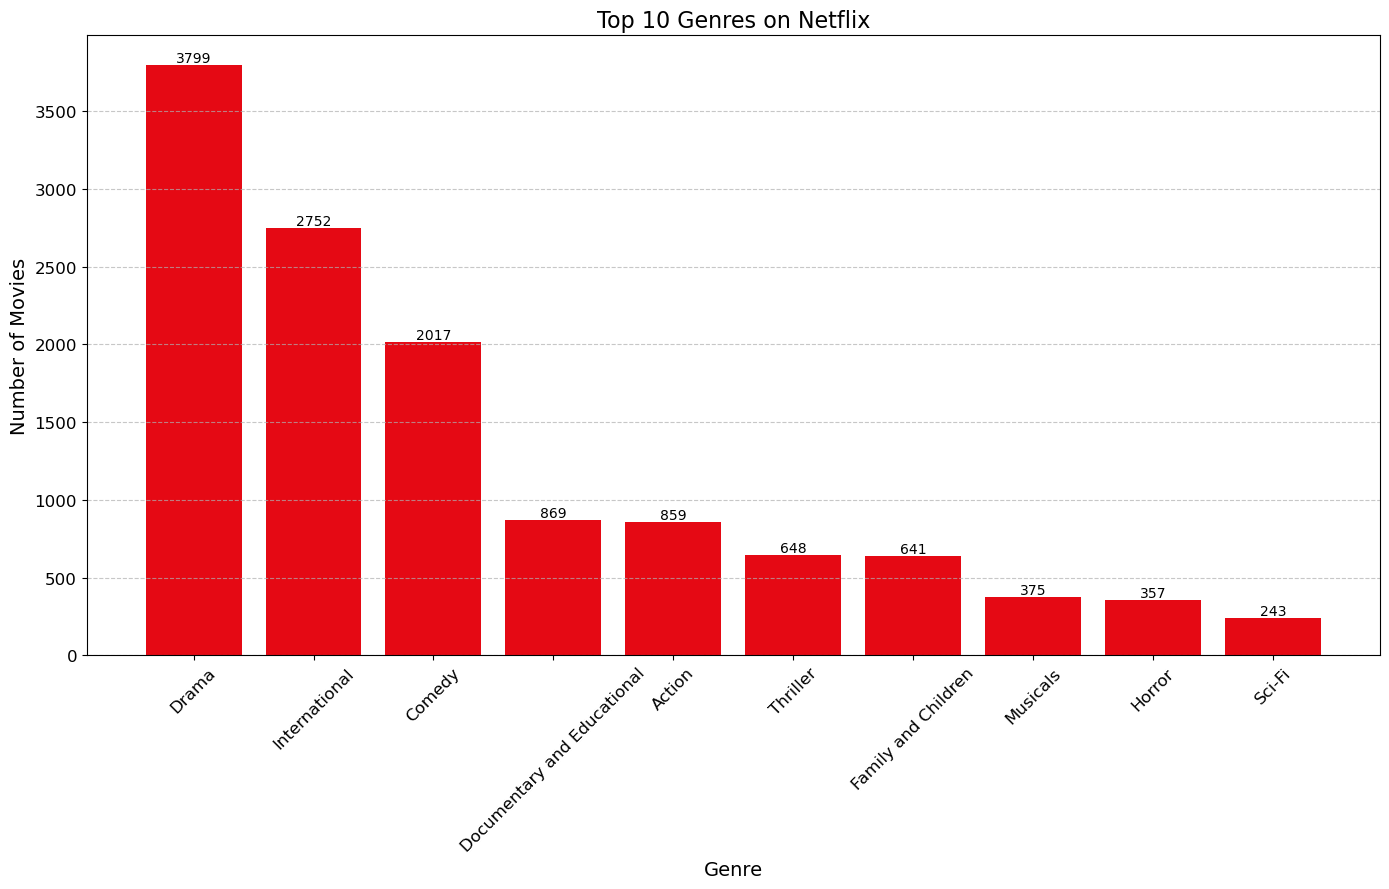

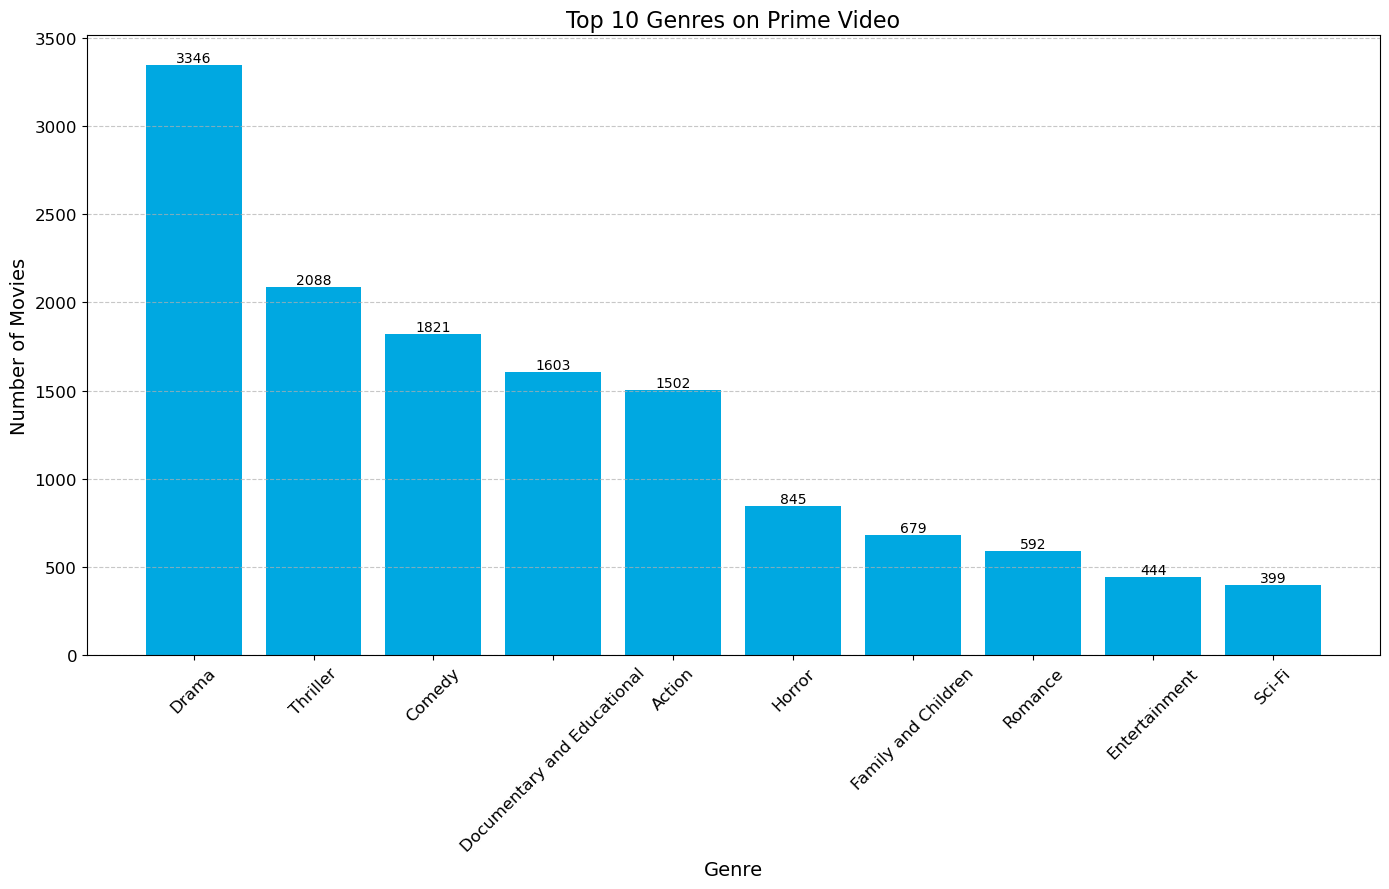

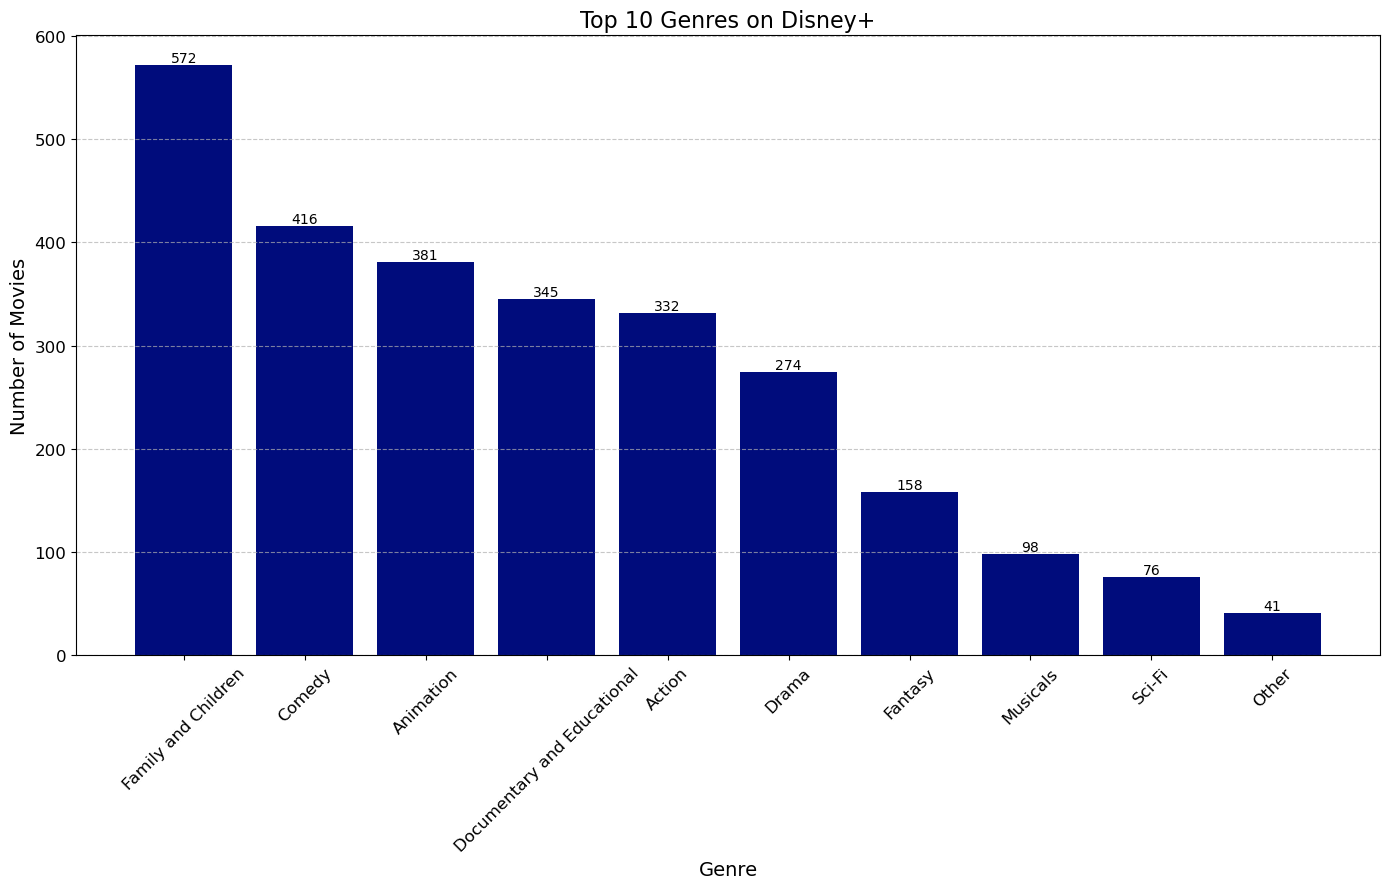

In [6]:
def plot_top_10_genres_movie_count(genre_counts, platform_name, color):
    plt.figure(figsize=(14, 9))
    # Select only the top 10 genres
    top_10_genres = genre_counts.head(10)
    bars = plt.bar(top_10_genres.index, top_10_genres.values, color=color)
    
    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10)

    plt.title(f'Top 10 Genres on {platform_name}', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    
    plt.tight_layout()
    plt.show()

# Colors for each platform (you can adjust these if you've found better matches)
netflix_color = '#E50914'  # Deep red for Netflix
prime_video_color = '#00A8E1'  # Dark blue for Prime Video
disney_plus_color = '#000c7c'  # Light blue for Disney+

# Generate enhanced plots for each platform
plot_top_10_genres_movie_count(netflix_movies_genre_counts, 'Netflix', netflix_color)
plot_top_10_genres_movie_count(prime_video_movies_genre_counts, 'Prime Video', prime_video_color)
plot_top_10_genres_movie_count(disney_plus_movies_genre_counts, 'Disney+', disney_plus_color)


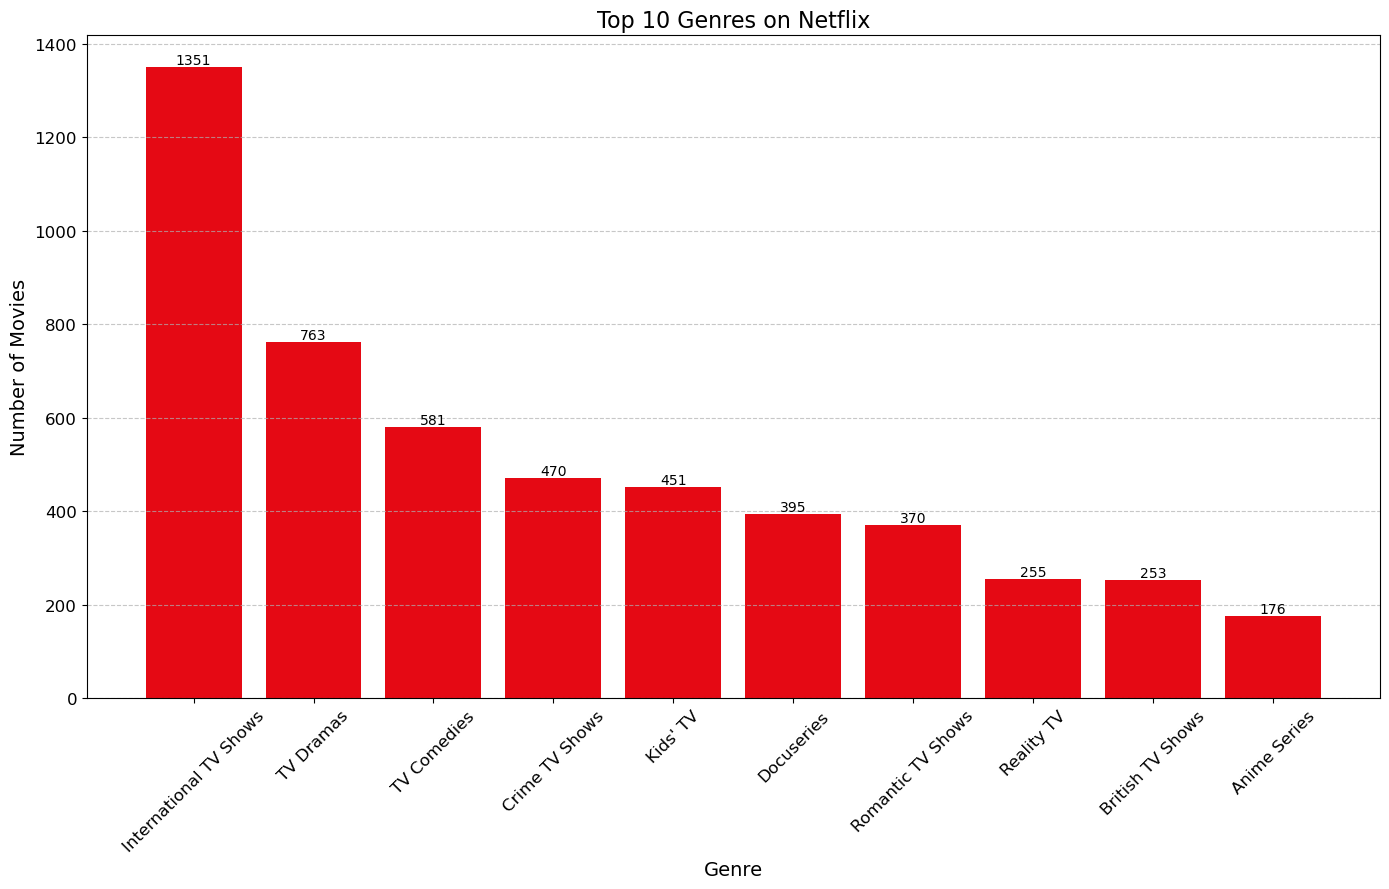

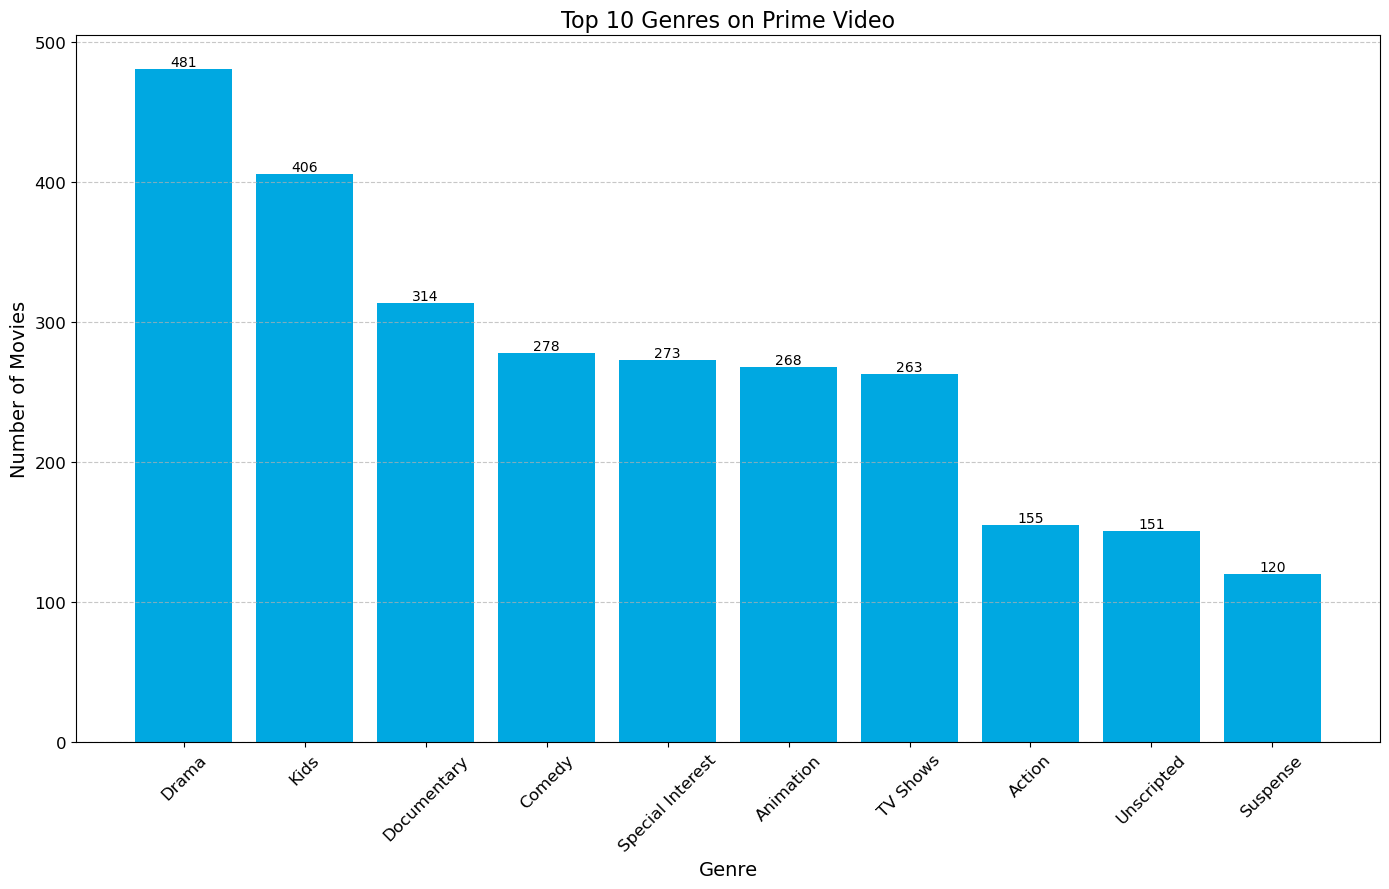

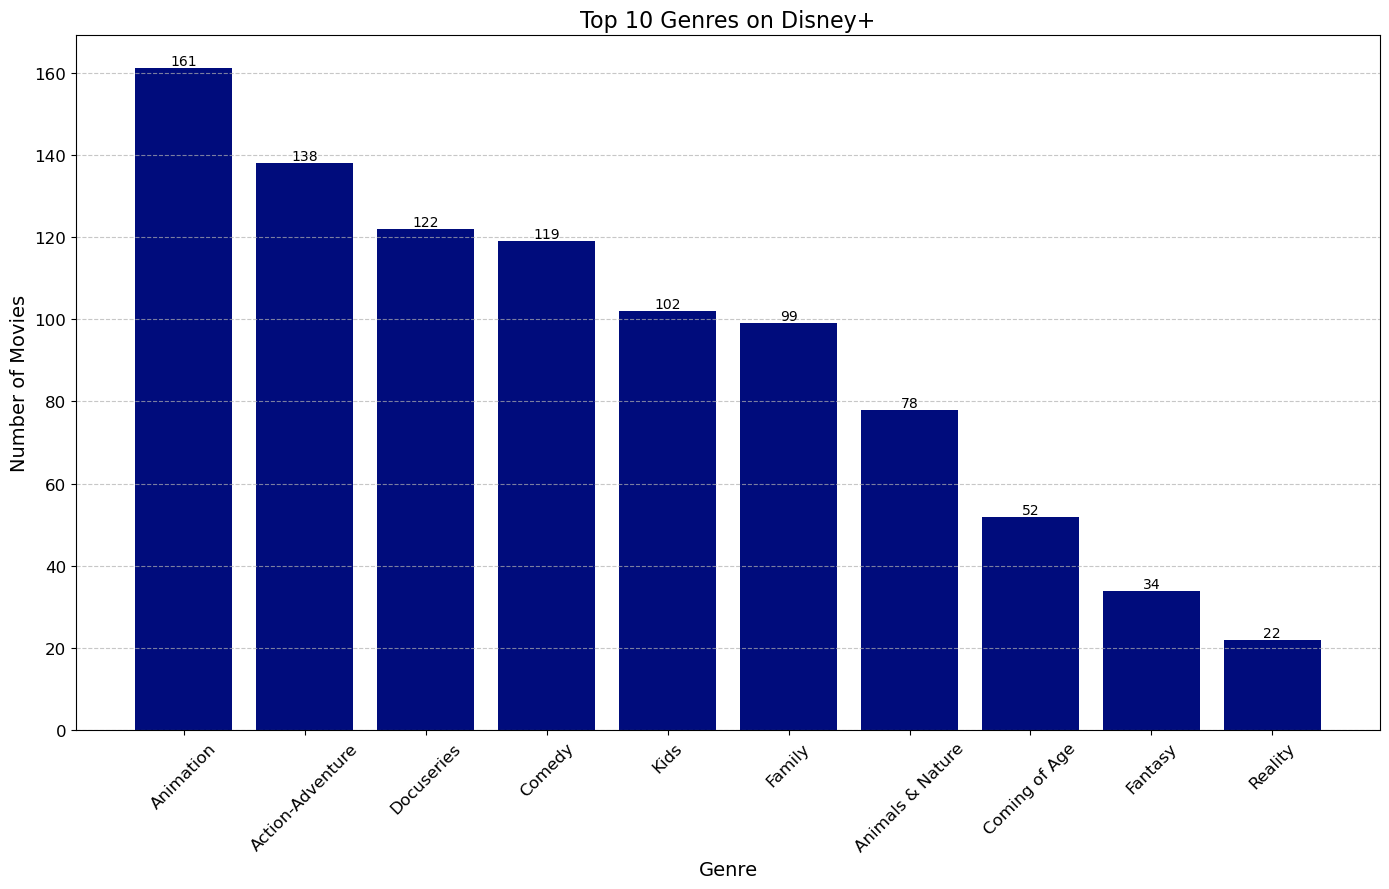

In [7]:
def plot_top_10_genres_series_count(genre_counts, platform_name, color):
    plt.figure(figsize=(14, 9))
    # Select only the top 10 genres
    top_10_genres = genre_counts.head(10)
    bars = plt.bar(top_10_genres.index, top_10_genres.values, color=color)
    
    # Add numbers on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center', fontsize=10)

    plt.title(f'Top 10 Genres on {platform_name}', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Number of Movies', fontsize=14)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
    
    plt.tight_layout()
    plt.show()

# Generate enhanced plots for each platform
plot_top_10_genres_series_count(netflix_series_genre_counts, 'Netflix', netflix_color)
plot_top_10_genres_series_count(prime_video_series_genre_counts, 'Prime Video', prime_video_color)
plot_top_10_genres_series_count(disney_plus_series_genre_counts, 'Disney+', disney_plus_color)


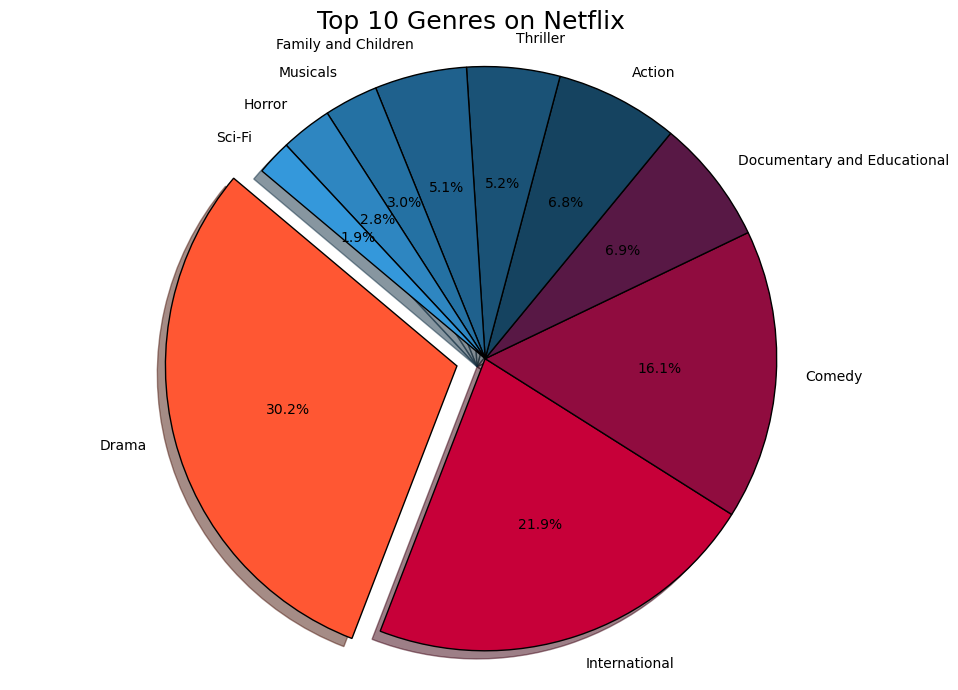

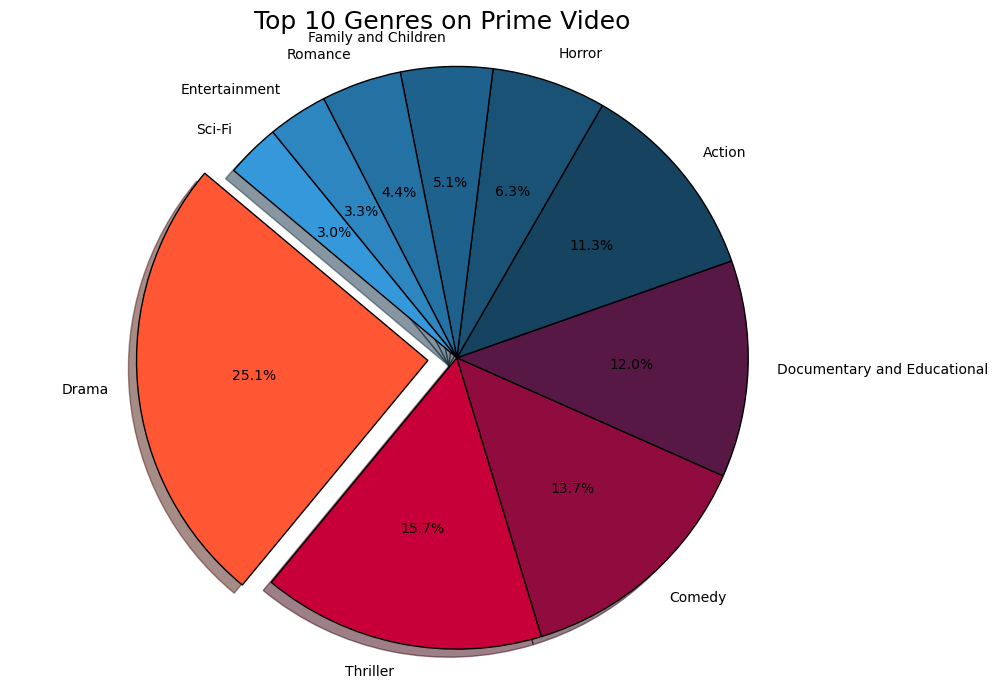

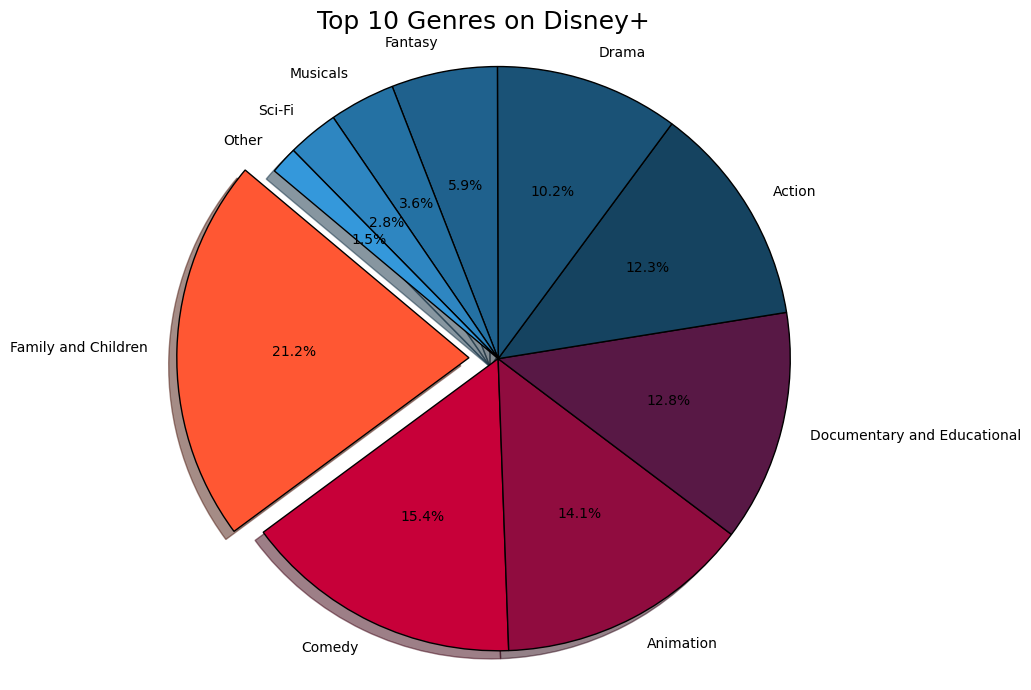

In [8]:
def plot_top_10_genres_movie_count_pie(genre_counts, platform_name):
    # Select only the top 10 genres
    top_10_genres = genre_counts.head(10)

    # Modern, contrasted color palette
    colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#154360', '#1A5276', '#1F618D', '#2471A3', '#2E86C1', '#3498DB']

    # Calculate explode data to separate the largest segment
    explode = [0.1 if i == top_10_genres.idxmax() else 0 for i in top_10_genres.index]

    plt.figure(figsize=(10, 7))
    plt.pie(top_10_genres, labels=top_10_genres.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode, shadow=True, wedgeprops={'edgecolor': 'black'})
    plt.title(f'Top 10 Genres on {platform_name}', fontsize=18)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # Improve the display
    plt.tight_layout()
    plt.show()

# Generate enhanced pie charts for each platform
plot_top_10_genres_movie_count_pie(netflix_movies_genre_counts, 'Netflix')
plot_top_10_genres_movie_count_pie(prime_video_movies_genre_counts, 'Prime Video')
plot_top_10_genres_movie_count_pie(disney_plus_movies_genre_counts, 'Disney+')

In [9]:
import tkinter as tk
from tkinter import PhotoImage
from PIL import Image, ImageTk

def center_window(win):
    win.update_idletasks()
    width = win.winfo_width()
    frm_width = win.winfo_rootx() - win.winfo_x()
    win_width = width + 2 * frm_width
    height = win.winfo_height()
    titlebar_height = win.winfo_rooty() - win.winfo_y()
    win_height = height + titlebar_height + frm_width
    x = win.winfo_screenwidth() // 2 - win_width // 2
    y = win.winfo_screenheight() // 2 - win_height // 2
    win.geometry('{}x{}+{}+{}'.format(width, height, x, y))
    win.deiconify()

def show_recommendation():
    clear_window()
    
    tk.Label(app, text="Based on your criteria, we would recommend:", pady=10).pack(expand=True)
    
    for i in range(1, 4):
        tk.Label(app, text=f"{i}. Platform").pack()

    tk.Button(app, text="Back to Start page", command=welcome_window, padx=20, pady=10).pack(side=tk.LEFT, padx=(100, 10), pady=(10, 20))
    tk.Button(app, text="Close", command=app.destroy, padx=20, pady=10).pack(side=tk.RIGHT, padx=(10, 100), pady=(10, 20))

def input_window(content_type):
    clear_window()
    global genre_entry, length_entry, rating_entry
    
    tk.Label(app, text=content_type, pady=10).pack()
    
    tk.Label(app, text="Genre").pack()
    genre_entry = tk.Entry(app)
    genre_entry.pack()
    
    length_label_text = "Movie length (minutes)" if content_type == "Movies" else "Seasons"
    tk.Label(app, text=length_label_text).pack()
    length_entry = tk.Entry(app)
    length_entry.pack()

    tk.Label(app, text="Rating (e.g., PG, PG-13)").pack()
    rating_entry = tk.Entry(app)
    rating_entry.pack()

    tk.Button(app, text="Enter", command=lambda: show_recommendation()).pack(pady=20)

def content_selection_window():
    clear_window()
    tk.Button(app, text="Movie?", command=lambda: input_window("Movies"), padx=20, pady=10).pack(pady=10)
    tk.Button(app, text="TV Show?", command=lambda: input_window("TV Shows"), padx=20, pady=10).pack(pady=10)

def welcome_window():
    clear_window()
    # Use Pillow to open the image
    logo_path = '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/imagescinemalytics_nobackground.png'
    img = Image.open(logo_path)
    img = img.resize((100, 100), Image.ANTIALIAS)  # Resize if needed
    logo_image = ImageTk.PhotoImage(img)
    logo_label = Label(app, image=logo_image)
    logo_label.image = logo_image  # Keep a reference
    logo_label.pack(pady=20)
    
    tk.Label(app, text="Welcome to StreamSelect!", pady=10).pack()
    tk.Button(app, text="Start", command=content_selection_window, padx=20, pady=10).pack()
    tk.Label(app, text="© 2024 StreamSelect, Inc.", pady=10).pack(side=tk.BOTTOM)

def clear_window():
    for widget in app.winfo_children():
        widget.destroy()

app = tk.Tk()
app.title("StreamSelect - Platform Recommender")
app.geometry('400x400')
center_window(app)  # Center the window on the screen

welcome_window()

app.mainloop()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/samer/Documents/github_repos/StreamSelect/OTT_SUGGESTER/imagescinemalytics_nobackground.png'

: 